<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/EN/S04_Data_Structures_2/book_chapter_data_structure_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python data structures - Part II

Beyond the previously data structures from the standard Python library, there exist various data structures that are available through third-party libraries. Notably, one of the most practical and flexible data structure is `DataFrame` which is included in the library `pandas`

Programming topics covered in this chapter include
* Creating `DataFrame` and `Series` objects
* Reading and writing data using pandas
* Indexing, selecting and assigning
* Summary functions and operations
* Grouping and sorting
* Data types and missing values
* Renaming and combining

Examples include:
* Importing and analyzing data of cereal sales

----
## Preliminaries

**pandas** is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. This notebook provides a summary of the different components you have seen during the [Kaggle Pandas course](https://www.kaggle.com/learn/pandas). 

There are two core objects in pandas: 
* `Series`: A Series is a sequence of indexde values. This is similar to a dictionary. However, Series is the simple form of DataFrame which is much more flexible and pandas offers a large number of pre-built functions and methods for this. You can think about a Series as a DataFrame with a single column. 
* `DataFrame`: A DataFrame is a data table (similar to a simple data table in Excel with rows and columns). It contains a set of columns which share the same set of indexes. Each column provides the values which correspond to the indexes in the index list.

**Note that most operations in pandas are returning you a new object. These operations are not generally done "in-place". Thus, if you want to keep your results, you need to assign them to a variable (examples will be provided in this notebook).**

---
## Creating `DataFrame` and `Series` objects

To use the pandas library, you first need to import it; you can and should import it only one time per Jupyter Notebook. You can do this using different ways (as also for other libraries). The first approach consists of the following:
``` python
import pandas
```
By doing so, you then need to use `pandas` in front of all the pandas elements you want to access. For example, to create a `DataFrame`, you would need to do the following:
``` python
pandas.DataFrame({'Yes':[50, 21], 'No':[131, 2]})
```
---
The second approach consists of importing the library under an alias (i.e., a different name). A convention when importing pandas is to import it under the name `pd`. This allows to reduce the number of letters to type afterwards. For example, the previous code would reduce to:
``` python
import pandas as pd
pd.DataFrame({'Yes':[50, 21], 'No':[131, 2]})
```
---
The third approach consists of importing only the elements you need from the library. For example, if we just need the `DataFrame` object, we could do the following:
``` python
from pandas import DataFrame
DataFrame({'Yes':[50, 21], 'No':[131, 2]})
```
---
We can import `pandas` using the following code (**NOTE**: this step is important as we need to import pandas before using it!):

In [1]:
import pandas as pd

### `Series`
It is possible to create a `Series` by providing a list. A `Series` can be considered as one column of a `DataFrame`.

In [2]:
pd.Series([4, 5, 2, 9])

0    4
1    5
2    2
3    9
dtype: int64

### `DataFrame`
The two main objects of interest in the `pandas` library are the `DataFrame` and `Series` objects. It is possible to create a `DataFrame` by passing a dictionnary where the keys are the column labels and the values are lists containing the different elements of the corresponding column. Note that all lists should be of the same length.

In [3]:
pd.DataFrame({'Yes':[50, 21], 'No':[131, 2]})

,Yes,No
0,50,131
1,21,2


---
## Reading and writing data using pandas

### Importing Data
One common use of pandas is to import the data from a file containing a data table (which can be prepared in Excel). 

**Option 1: Importing file in Jupyter Notebook**: This can be done using the commands `read_csv()` for CSV (Comma-Separated Values) files or `read_excel()` for Excel files. Other options are also available in the pandas documentation.

**If you use Jupyter Notebook**, you can run the code below. 

``` python
# Import the column WEEK_END_DATE as dates
df = pd.read_csv('salesCerealsOriginal.csv', parse_dates=['WEEK_END_DATE']) 
df.shape
```

**Option 2: Importing file in Colab Notebook**: Since Colab is on the cloud, one simple way is to upload it directly. This can be done using the code below **if you use Colab** and then click on "Choose Files" to upload it.

``` python
from google.colab import files
import io 

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['salesCerealsOriginal.csv']), parse_dates=['WEEK_END_DATE']) 
df.shape
```

**Option 3: Download file from an URL**: We can also download the file which has been uploaded to an URL (such as Github) directly. In this example, we will use this option to load the csv file directly from the link.

In [4]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/EN/S04_Data_Structures_2/salesCerealsOriginal.csv'
df = pd.read_csv(url)
df.shape

(1067, 15)

We can quickly see an overview of the data using the function `.head()`

In [5]:
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL


In [6]:
df.dtypes

WEEK_END_DATE     object
STORE_NUM          int64
UPC                int64
UNITS              int64
VISITS             int64
HHS                int64
SPEND            float64
PRICE            float64
BASE_PRICE       float64
FEATURE            int64
DISPLAY            int64
TPR_ONLY           int64
DESCRIPTION       object
CATEGORY          object
SUB_CATEGORY      object
dtype: object


**Note:**
* `.read_csv()`: is an important pandas function to read csv files and do operations on it
* `parse_dates`: is a parameter of the `.read_csv()` function. It converts the specified data in datetime datatype. Check [this page](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_csv.html) for more information about the parameters of the `.read_csv()` function
* `df.shape`: Return a tuple representing the dimensionality of the DataFrame `df`
* `.head()`: This function returns the first `n` rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default, `n=5`, so that `df.head()` returns only the first 5 rows of the CSV file read and assigned to `df` 

Here is a description of the variables in the previous `DataFrame`. This file will also be reused in subsequent sessions.

| VARIABLE NAME | DESCRIPTION | 
|:----|:----|
|WEEK_END_DATE|week ending date|
|STORE_NUM|store number|
|UPC|(Universal Product Code) product specific identifier|
|UNITS|units sold|
|VISITS|number of unique purchases (baskets) that included the product|
|HHS|# of purchasing households|
|SPEND|total spend (i.e., $ sales)|
|PRICE|actual amount charged for the product at shelf|
|BASE_PRICE|base price of item|
|FEATURE|product was in in-store circular|
|DISPLAY|product was a part of in-store promotional display|
|TPR_ONLY|temporary price reduction only (i.e., shelf tag only, product was reduced in price but not on display or in an advertisement)|
|DESCRIPTION|product description|
|CATEGORY|category of product|
|SUB_CATEGORY|sub-category of product|



### Exporting Data
**In Jupyter Notebook**: Exporting data can be done with the methods such as `to_csv()` and `to_excel()`.

``` python
df.to_csv("downloaded_data.csv")
```

**In Colab**: After running the block above, you can download using the following function of the module `files`

```python
files.download("downloaded_data.csv")
```

## Indexing, Selecting and Assigning

You can access any columns of a `DataFrame` by either using the dot-notation or by using square brackets `[]`. Then, you can access a specific row within this column by using the brackets `[]` again with the row number. Note that this second indexing can sometime lead to strange results depending on how the indexes are set.

Let's take a look to the UPC column:

In [7]:
df.UPC

0       1111085319
1       1111085350
2       1600027527
3       1600027528
4       1600027564
           ...    
1062    1111085350
1063    1600027527
1064    1600027528
1065    1600027564
1066    3800031829
Name: UPC, Length: 1067, dtype: int64

In [8]:
df.UPC[0]

1111085319

In [9]:
df['UPC'][0]

1111085319

Note that we can use either `df.UPC[0]` or `df['UPC'][0]` to access the  Universal Product Code of the first item in the list.

### Index-based selection
Another way to access elements of a `DataFrame` is by using **index-based selection**, i.e., the `iloc[row_number, col_number]` method. For example, to access the first row of the column number 3 (i.e., the column 'UPC'), we do

In [10]:
df.iloc[0,2]

1111085319

### Label-based selection
A third option consists of **label-based selection** where we selects by the row and column labels, i.e., the `.at[]` and `.loc[]` methods. Continuing on our last example, we do

If you want to access a *single* cell using the index and column names, you can also use `.at[index_name, col_name]` as follows.

In [11]:
df.at[0, 'UPC']

1111085319

Alternatively, we can also use `.loc[]` as follows. 

In [12]:
df.loc[0,'UPC']

1111085319

Note that the difference between `loc[]` and `at[]` is that `.loc[]` is much more flexible and we can use it to obtain the values from more than one cell. In this case, we can use the `loc[]` method with conditional statements (boolean masks). For example, to show all the rows related to the UPC 1111085319, we can do the following. 

In [13]:
df.loc[df.UPC == 1111085319]

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
7,2009-01-21,367,1111085319,12,12,12,22.68,1.89,1.89,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
14,2009-01-28,367,1111085319,18,17,16,33.66,1.87,1.87,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
21,2009-02-04,367,1111085319,13,13,13,24.44,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
28,2009-02-11,367,1111085319,16,16,16,29.92,1.87,1.87,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,2011-12-07,367,1111085319,12,12,12,21.84,1.82,1.82,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1043,2011-12-14,367,1111085319,14,14,14,22.82,1.63,1.82,0,0,1,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1049,2011-12-21,367,1111085319,8,8,8,13.36,1.67,1.67,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
1055,2011-12-28,367,1111085319,3,2,2,4.95,1.65,1.65,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL


These boolean expressions can be mixed with the symbol `&` to denote an element-wise 'and', and the symbol `|` to denote an element-wise 'or'. Please note that we cannot directly use the terms `and` and `or` as pandas accepts only the symbols for boolean expressions (see [link](https://pandas.pydata.org/pandas-docs/version/0.15.2/indexing.html#boolean-indexing)).

In [14]:
df.loc[(df.UPC == 1111085319) & (df.FEATURE == True)]

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY
112,2009-05-06,367,1111085319,31,28,27,51.46,1.66,1.89,1,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
217,2009-08-19,367,1111085319,22,22,21,36.08,1.64,1.89,1,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
788,2011-03-16,367,1111085319,15,13,13,25.05,1.67,1.89,1,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL
802,2011-03-30,367,1111085319,14,12,12,23.38,1.67,1.89,1,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL


### Selecting a subset of columns and rows
We can also use `.loc[row_range, [col_names]]` to slice a subset of rows and columns. We can also assign this to a new DataFrame object.

In [15]:
df_col_row_subset = df.loc[:5,['UPC','UNITS']]
df_col_row_subset # display the result

,UPC,UNITS
0,1111085319,14
1,1111085350,35
2,1600027527,12
3,1600027528,31
4,1600027564,56
5,3000006340,19


We can also use double brackets `[[]]` to indicate the columns we want to select (this will select all rows)

In [16]:
df_col_subset = df[['UPC','UNITS']]
df_col_subset # display the new object of DataFrame

,UPC,UNITS
0,1111085319,14
1,1111085350,35
2,1600027527,12
3,1600027528,31
4,1600027564,56
...,...,...
1062,1111085350,1
1063,1600027527,31
1064,1600027528,27
1065,1600027564,35


## Data Summary Functions 

Some interesting summary functions are the `describe()`, `unique()` and `value_counts()` methods. By running these methods below, we are able to find that there is only one store in this dataset and that only 7 different UPCs are in the dataset. We also find that there is data for 156 weeks.
These functions are very useful to do a preliminary analysis of our data.

* `describe()`: This method generates a high-level summary of the attributes of the given column. It is type-aware, meaning that its output changes based on the data type of the input (string or numerical).

In [17]:
df.describe()

,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
count,1067.0,1.067000e+03,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,367.0,1.951150e+09,21.254920,18.419869,14.753515,62.282971,2.913627,3.074808,0.085286,0.059044,0.156514
std,0.0,9.459679e+08,16.805829,13.416754,12.507940,47.895126,0.894750,0.863631,0.279438,0.235818,0.363512
min,367.0,1.111085e+09,1.000000,1.000000,1.000000,1.870000,1.510000,1.600000,0.000000,0.000000,0.000000
25%,367.0,1.111085e+09,12.000000,12.000000,8.000000,28.715000,2.060000,2.430000,0.000000,0.000000,0.000000
50%,367.0,1.600028e+09,19.000000,17.000000,13.000000,50.880000,2.850000,3.050000,0.000000,0.000000,0.000000
75%,367.0,3.000006e+09,27.000000,23.000000,18.000000,81.920000,3.290000,3.290000,0.000000,0.000000,0.000000
max,367.0,3.800032e+09,243.000000,187.000000,179.000000,414.400000,4.790000,4.790000,1.000000,1.000000,1.000000


* `unique()`: shows a list of unique values

NOTE: `df.COLUMN_NAME` can also be used when selecting a *single* column. However, you have to ensure that the column name does not contain any space or special character. Otherwise, you can still use `df[['col_name']]` for this.

In [18]:
df.STORE_NUM.unique()

array([367])

* `.value_counts()`: shows a list of unique values and how often they occur in the dataset

In [19]:
df.UPC.value_counts()

1111085319    156
1111085350    156
1600027527    156
1600027528    156
1600027564    155
3800031829    155
3000006340    133
Name: UPC, dtype: int64

In [20]:
df.WEEK_END_DATE.value_counts()

2009-01-14    7
2010-08-25    7
2010-12-15    7
2010-12-08    7
2010-12-01    7
             ..
2011-08-17    6
2011-06-22    6
2010-11-17    6
2010-09-15    6
2012-01-04    6
Name: WEEK_END_DATE, Length: 156, dtype: int64

## Computing values for a new column

We can also apply standard calculations to all the elements in a column and add the results to a new column.

In [21]:
df['zNormSPEND'] = (df.SPEND - df.SPEND.mean()) / df.SPEND.std()
df['zNormSPEND']

0      -0.750869
1       0.146508
2      -0.501157
3       1.670463
4       1.879879
          ...   
1062   -1.248415
1063   -0.051215
1064    1.399872
1065    1.030732
1066    0.892513
Name: zNormSPEND, Length: 1067, dtype: float64

---
### Apply
The `apply()` method allows to go through each row or each column. You can review more details here: [link](https://www.w3resource.com/pandas/dataframe/dataframe-apply.php) (NOTE: this function is not a basic one but quite useful in practice. It is fine if you do not fully understand it).

As an example, let's compute the price rebate in percentage $\left(\frac{\mathit{BASE\_PRICE} - \mathit{PRICE}}{\mathit{BASE\_PRICE}}\right) $ when the item is in the circular ($\mathit{FEATURE}$  is equal to 1). We then add this computation to the column `REBATE_PERC`.

In [22]:
def rebate_perc(row):
    if row.FEATURE == 1:
        rebate = (row.BASE_PRICE - row.PRICE) / row.BASE_PRICE
        return rebate
    else:
        return 0

# axis='columns' allows to go through each row
# axis='index' allows to go through each column
df['REBATE_PERC'] = df.apply(rebate_perc, axis='columns')
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,zNormSPEND,REBATE_PERC
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-0.750869,0.000000
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,0.146508,0.000000
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,-0.501157,0.000000
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.670463,0.000000
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.879879,0.114007


Alternatively, we can also use **list comprehension** to calculate each element iteratively as well (If you use this option, please make sure you correctly generate the elements for all rows). The code below is equivalent to the one above but we use list comprehension. This option is not recommended for complex operations as the code will be difficult to read.

In [23]:
df['REBATE_PERC_V2'] = [(df.at[i,'BASE_PRICE'] - df.at[i,'PRICE']) / df.at[i,'BASE_PRICE'] \
                        if df.at[i,'FEATURE'] == 1 else 0 for i in df.index]
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,zNormSPEND,REBATE_PERC,REBATE_PERC_V2
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-0.750869,0.000000,0.000000
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,0.146508,0.000000,0.000000
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,-0.501157,0.000000,0.000000
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.670463,0.000000,0.000000
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.879879,0.114007,0.114007


---
## Grouping and Sorting

### Group by
The `groupby()` method is similar to the PivotTables in Excel. It allows the group the items by one or several dimensions (the Rows and Columns area in the PivotTable). After grouping the items, you can then compute some summary functions over these groups (the Values area in the PivotTable). These summary functions can be your own defined by a `lambda` expression or a standard function definition (using `def ...`).

As a first example, let's compute the mean selling price of each `UPC` over the data.

In [24]:
df.groupby('UPC').PRICE.mean()

UPC
1111085319    1.788910
1111085350    2.183333
1600027527    2.893077
1600027528    4.498590
1600027564    2.893355
3000006340    2.878195
3800031829    3.256774
Name: PRICE, dtype: float64

As a second example, let's compute the number of times that each `UPC` appeared in the circular. Remember that this variable is a binary variable.

In [25]:
df.groupby('UPC').FEATURE.sum()

UPC
1111085319     4
1111085350     9
1600027527    18
1600027528    12
1600027564    16
3000006340    17
3800031829    15
Name: FEATURE, dtype: int64

### Sort
It is also possible to sort `DataFrame` or `Series` by one or multiple variables by using the `sort_values()` method. If you want to instead sort the index, you need to use the `sort_index()` method.

For example, below, we are sorting first by `PRICE` and, if there are any equalities, we then sort by `BASE_PRICE`. This sorting is done in descending order.

In [26]:
df.sort_values(by=['PRICE', 'BASE_PRICE'], ascending=False)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,zNormSPEND,REBATE_PERC,REBATE_PERC_V2
784,2011-03-09,367,1600027528,27,20,8,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.399872,0.0,0.0
791,2011-03-16,367,1600027528,14,12,7,67.06,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,0.099739,0.0,0.0
798,2011-03-23,367,1600027528,16,15,4,76.64,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,0.299760,0.0,0.0
805,2011-03-30,367,1600027528,39,31,11,186.81,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,2.599994,0.0,0.0
812,2011-04-06,367,1600027528,29,22,6,138.91,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.599892,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,2009-03-04,367,1111085319,2,2,2,3.22,1.61,1.87,0,0,1,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-1.233173,0.0,0.0
308,2009-11-18,367,1111085319,20,20,20,32.00,1.60,1.88,0,0,1,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-0.632277,0.0,0.0
621,2010-09-29,367,1111085319,22,20,18,35.20,1.60,1.60,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-0.565464,0.0,0.0
635,2010-10-13,367,1111085319,30,24,24,48.00,1.60,1.60,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-0.298213,0.0,0.0


## Data Types and Missing Values

Pandas assigns different types to the different columns. Some common types are:
- `int` denoted by `int64`
- `float` denoted by `float64`
- `str` denoted by `object`
- dates denoted by `datetime64[ns]`

Pandas may denote your dates as `object` if it doesn't understand that these are dates. It doesn't make a big difference unless you want to use some of the nice functions available in pandas to manipulate dates.

It is possible to check the type of a column by using the `dtype` property. It is also possible to check the type of all columns by using the `dtypes` property as below.

In [27]:
df.dtypes

WEEK_END_DATE      object
STORE_NUM           int64
UPC                 int64
UNITS               int64
VISITS              int64
HHS                 int64
SPEND             float64
PRICE             float64
BASE_PRICE        float64
FEATURE             int64
DISPLAY             int64
TPR_ONLY            int64
DESCRIPTION        object
CATEGORY           object
SUB_CATEGORY       object
zNormSPEND        float64
REBATE_PERC       float64
REBATE_PERC_V2    float64
dtype: object

If you want to convert the type of a column, you can use the `astype()` method.

For example, if we want to convert the type of `STORE_NUM` from `int64` to `float64`, we do the following:

In [28]:
df.STORE_NUM.astype('float64')  # or just use float

0       367.0
1       367.0
2       367.0
3       367.0
4       367.0
        ...  
1062    367.0
1063    367.0
1064    367.0
1065    367.0
1066    367.0
Name: STORE_NUM, Length: 1067, dtype: float64

### Missing data
It is possible to check whether there are null values in a column of a `DataFrame` (or a full `DataFrame`) by using the `isnull()` function (or its companion `notnull()`). These returns a binary mask indicating whether any null values (denoted by `NaN`) are present. Note that `NaN` values are always of type `float64`.

Let's check below if we have any missing values in the column `SPEND`.

In [29]:
pd.isnull(df.SPEND)

0       False
1       False
2       False
3       False
4       False
        ...  
1062    False
1063    False
1064    False
1065    False
1066    False
Name: SPEND, Length: 1067, dtype: bool

Let's now check if there are any missing values in any columns.

In [30]:
pd.isnull(df).sum()

WEEK_END_DATE     0
STORE_NUM         0
UPC               0
UNITS             0
VISITS            0
HHS               0
SPEND             0
PRICE             0
BASE_PRICE        0
FEATURE           0
DISPLAY           0
TPR_ONLY          0
DESCRIPTION       0
CATEGORY          0
SUB_CATEGORY      0
zNormSPEND        0
REBATE_PERC       0
REBATE_PERC_V2    0
dtype: int64

If we had found any missing values, we could have replaced them by using the `fillna()` method. It is also possible to replace other values by using the `replace()` method.

Since the table does not contain any null value, we first manually add a new column with no values (which will automatically contains `None`)

In [31]:
df['NewColumn'] = None
df['NewColumn'] # display this column

0       None
1       None
2       None
3       None
4       None
        ... 
1062    None
1063    None
1064    None
1065    None
1066    None
Name: NewColumn, Length: 1067, dtype: object

In [32]:
df[['UPC', 'UNITS', 'NewColumn']].isnull() # the new column return True

,UPC,UNITS,NewColumn
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1062,False,False,True
1063,False,False,True
1064,False,False,True
1065,False,False,True


If you want to replace such values by something else, you can do so by simply calling the method `fillna()`. Note that if you want to keep the results, you need to assign it to a new variable (which can be the same variable of this original DataFrame object if you want to replace it)

In [33]:
df = df.fillna('Unavailable')
df[['NewColumn']] # the values would now change

,NewColumn
0,Unavailable
1,Unavailable
2,Unavailable
3,Unavailable
4,Unavailable
...,...
1062,Unavailable
1063,Unavailable
1064,Unavailable
1065,Unavailable


Alternatively, you can also replace some values as specified. For example, if you want to replace the `STORE_NUM` 367 with some text, you can also use. (Note here that there is only one store number in the data).

In [34]:
df['STORE_TXT'] = df.STORE_NUM.replace(367, 'Kwik-E-Mart')
df

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,zNormSPEND,REBATE_PERC,REBATE_PERC_V2,NewColumn,STORE_TXT
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-0.750869,0.000000,0.000000,Unavailable,Kwik-E-Mart
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,0.146508,0.000000,0.000000,Unavailable,Kwik-E-Mart
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,-0.501157,0.000000,0.000000,Unavailable,Kwik-E-Mart
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.670463,0.000000,0.000000,Unavailable,Kwik-E-Mart
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.879879,0.114007,0.114007,Unavailable,Kwik-E-Mart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2012-01-04,367,1111085350,1,1,1,2.49,2.49,2.49,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,-1.248415,0.000000,0.000000,Unavailable,Kwik-E-Mart
1063,2012-01-04,367,1600027527,31,29,29,59.83,1.93,3.12,1,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,-0.051215,0.381410,0.381410,Unavailable,Kwik-E-Mart
1064,2012-01-04,367,1600027528,27,26,21,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.399872,0.000000,0.000000,Unavailable,Kwik-E-Mart
1065,2012-01-04,367,1600027564,35,29,25,111.65,3.19,3.19,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.030732,0.000000,0.000000,Unavailable,Kwik-E-Mart


---
## Renaming and Combining

It is also possible to rename indexes or columns by using the `rename()` method. An elegant way to use this method is by providing a dictionnary where the keys are the indexes/columns current labels and the values are the indexes/columns new labels.

For example, let's rename the `WEEK_END_DATE` column to `END_DATE`.

In [35]:
df.rename(columns={'WEEK_END_DATE': 'END_DATE'}) 
# Note that the resulting DataFrame is not assigned back to the original one if we don't indicate df = ...

,END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,zNormSPEND,REBATE_PERC,REBATE_PERC_V2,NewColumn,STORE_TXT
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-0.750869,0.000000,0.000000,Unavailable,Kwik-E-Mart
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,0.146508,0.000000,0.000000,Unavailable,Kwik-E-Mart
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,-0.501157,0.000000,0.000000,Unavailable,Kwik-E-Mart
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.670463,0.000000,0.000000,Unavailable,Kwik-E-Mart
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.879879,0.114007,0.114007,Unavailable,Kwik-E-Mart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2012-01-04,367,1111085350,1,1,1,2.49,2.49,2.49,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,-1.248415,0.000000,0.000000,Unavailable,Kwik-E-Mart
1063,2012-01-04,367,1600027527,31,29,29,59.83,1.93,3.12,1,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,-0.051215,0.381410,0.381410,Unavailable,Kwik-E-Mart
1064,2012-01-04,367,1600027528,27,26,21,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.399872,0.000000,0.000000,Unavailable,Kwik-E-Mart
1065,2012-01-04,367,1600027564,35,29,25,111.65,3.19,3.19,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.030732,0.000000,0.000000,Unavailable,Kwik-E-Mart


As another example, let's rename the index 0 to 'First row' and then the index 1 to 'Second row'.

In [36]:
df.rename(index={0:'First row', 1:'Second row'})
# Note that the resulting DataFrame is not assigned back to the original one if we don't indicate df = ...

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,zNormSPEND,REBATE_PERC,REBATE_PERC_V2,NewColumn,STORE_TXT
First row,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,-0.750869,0.000000,0.000000,Unavailable,Kwik-E-Mart
Second row,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,0.146508,0.000000,0.000000,Unavailable,Kwik-E-Mart
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,-0.501157,0.000000,0.000000,Unavailable,Kwik-E-Mart
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.670463,0.000000,0.000000,Unavailable,Kwik-E-Mart
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.879879,0.114007,0.114007,Unavailable,Kwik-E-Mart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2012-01-04,367,1111085350,1,1,1,2.49,2.49,2.49,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,-1.248415,0.000000,0.000000,Unavailable,Kwik-E-Mart
1063,2012-01-04,367,1600027527,31,29,29,59.83,1.93,3.12,1,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,-0.051215,0.381410,0.381410,Unavailable,Kwik-E-Mart
1064,2012-01-04,367,1600027528,27,26,21,129.33,4.79,4.79,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.399872,0.000000,0.000000,Unavailable,Kwik-E-Mart
1065,2012-01-04,367,1600027564,35,29,25,111.65,3.19,3.19,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,1.030732,0.000000,0.000000,Unavailable,Kwik-E-Mart


---
## Plotting data
Plotting methods allow for the default line plot a handful of plot styles. These methods can be provided as the kind keyword argument to `plot()`, and include:

* `‘bar’` or `‘barh’` for bar plots
* `‘hist’` for histogram
* `‘box’` for boxplot
* `‘kde’` or `‘density’` for density plots
* `‘area’` for area plots
* `‘scatter’` for scatter plots
* `‘hexbin’` for hexagonal bin plots
* `‘pie’` for pie plots

You can check [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for more information.

As an example, let's visualize the number of units (`'UNITS'` column in our data frame). As `.plot()` is a method of `DataFrame` objects, we use double brackets `[[]]` to indicate the columns we want to visualize. A line plot is the default option of the `.plot()` method.

In the following code, we choose on the the `UNITS` of one product to be plotted. Since index will be on x-axis, we use `WEEK_END_DATE` to be the x-axis.

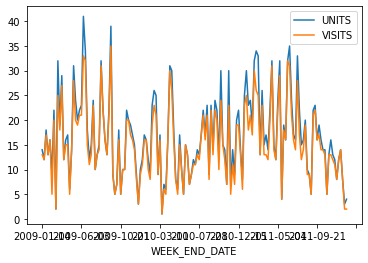

In [37]:
single_prod_df = df.loc[(df.UPC == 1111085319)][['UNITS', 'VISITS', 'WEEK_END_DATE']]
# we can set the index to be 'WEEK_END_DATE' (note that there is no duplicated value of 'WEEK_END_DATE' for each product)
single_prod_df = single_prod_df.set_index('WEEK_END_DATE')
single_prod_df.plot()

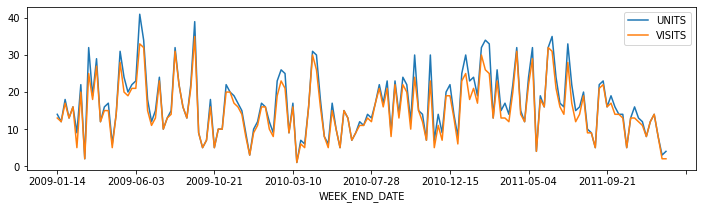

In [38]:
# we can also change the size of the plot
single_prod_df.plot(figsize=(12,3))

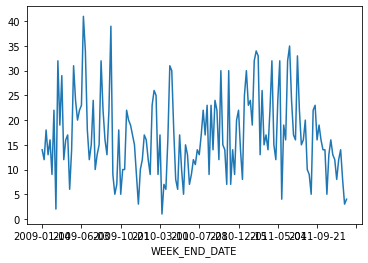

In [39]:
# We can also plot a single series by using:
single_prod_df.UNITS.plot()

We can combine some of the functions and methods of `DataFrame` objects to visualize mininful information. For instance, if we are interested in visualizing the number of sold units of each product (`'UPC'`), we can do:

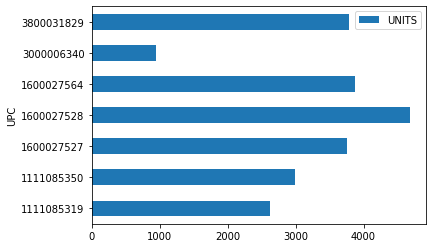

In [40]:
df2 = df.groupby(['UPC']).sum() 
df2.plot(y='UNITS', kind='barh')

Or if we are interested in visualizing the average price and base price for each product, we can do:

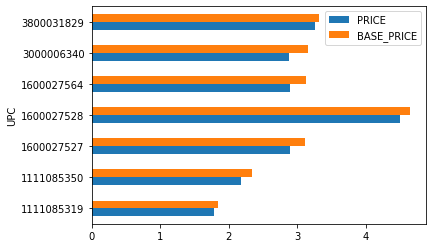

In [41]:
df3 = df.groupby(['UPC']).mean()
df3.plot(y=['PRICE', 'BASE_PRICE'], kind='barh')